# Clase 4: contenedores y más
Docente: Emiliano López - ``emiliano.lopez@gmail.com`` - tw: @yosobreip
- Fecha: 17-10-2019
- Unidad: Conceptos básicos
- Temas:
    - Revisión de un ejercicio de la clase previa
    - Listas
    - Diccionarios.

## Revisión ejercicio previo

- Analizaremos el contenido de un archivo de texto
- Contaremos sus vocales y sus consonantes
- Extenderemos este análisis a todos los archivos de un directorio usando el módulo ``glob``


## Listas y diccionarios

In [ ]:
%%html
<img src="img/io3.png", width=800>

## Revisión ejercicio 3.4
Vamos a contar la cantidad de vocales y consonantes de **UN** texto almacenado en ``datos/textos/``. Estrategia:

- Leer todo el contenido del texto en una sola cadena
- Recorrer letra a letra y fijarse si es vocal o consonante
    - En caso que sea vocal incrementar en 1 una variable (cant_voc) que iniciada en 0
    - En caso que sea consonante incrementar en 1 otra variable (cant_con) iniciada en 0
- **DESAFIO:** usando la función ``glob``, incluídra dentro del módulo del mismo nombre, extienda el ejercicio previo para todos los archivos de texto del directorio mencionado anteriormente.

In [ ]:
# 1ra versión de juguete simplificado
texto = "aaee; jhgf"
vocales = 0
consonantes = 0

for letra in texto:
    if letra in "aeiou":
        vocales = vocales + 1
    else:
        consonantes = consonantes + 1
print(vocales)
print(consonantes)

In [ ]:
# ahora usando un archivo contemplando acentos, 
# mayúsculas y exceptuando dígitos y símbolos
texto = open("datos/textos/cancion_alicia.txt").read()
vocales = 0
consonantes = 0

for letra in texto:
    if letra.lower() in "aeiouáéíóú":
        vocales = vocales + 1
    elif letra not in " ;,.1234567890\n":
        consonantes = consonantes + 1
print(vocales)
print(consonantes)

In [ ]:
# extendemos en análisis para todos los archivos
# bajo el dictorio datos/textos
import glob
archivos = glob.glob("datos/textos/*")

for txt in archivos:
    print(f"Archivo {txt}")
    texto = open(txt).read()
    vocales = 0
    consonantes = 0

    for letra in texto:
        if letra.lower() in "aeiouáéíóú":
            vocales = vocales + 1
        elif letra not in " ;,.1234567890\n":
            consonantes = consonantes + 1
    print(vocales)
    print(consonantes)

In [ ]:
# recordamos qué métodos podemos aplicarle a una cadena
a = "asd"
dir(a)

## Listas

A diferencia de una variable que contiene un único dato por vez, una lista puede almacenar varios datos en forma simultánea en diferentes posiciones, por lo que para referirnos a uno de ellos necesitamos especificarle el índice o posición. Hasta ahora cargamos elementos a una lista de dos maneras: 

- Al leer desde un archivo su contenido usando ``.readlines()``
- Al escribir manualmente dentro de los corchetes  sus valores

In [ ]:
# lista con 3 valores float
tempC = [12.2, 33.3, 12.1]

Veamos como agregar elementos a una lista a través del método ``append()``. Para eso veamos como hacer una segunda lista denominada ``tempK`` que almacene los valores de la lista ``tempC`` convertidos a grados Farenheit. La relación está dada por:

$$F = C*\frac{9}{5} + 32$$

In [ ]:
# creamos una nueva lista y vamos agregando los 
# valores convertidos a °F
tempF = []
for tc in tempC:
    tf = (tc*(9/5))+32
    tempF.append(tf)

In [ ]:
# también tenemos algo que se llama list comprenhension o listas por comprensión
tempF2 = [(tc*(9/5))+32 for tc in tempC]

In [ ]:
tempF

In [ ]:
tempF2

#### Ejercitación 4.1

- Resulta que las 3 temperaturas previas correspondían a diferentes ciudades, realice un programa que permita ingresar el nombre de las ciudades en forma interactiva (por teclado) y se almacenen en una lista nueva denominada ``ciudades``.

- Muestre por cada ciudad ingresada los 2 valores de temperatura

In [ ]:
# cargamos en una lista lo que se ingresa por teclado
ciudades = []
for i in range(3):
    c = input(f"Ingrese nombre de ciudad {i}=")
    ciudades.append(c)    

In [ ]:
# mostramos los valores de cada ciudad
for nc, tc, tf in zip(ciudades, tempC, tempF):
    print(f"{nc}: {tc}, {tf}")

## Operaciones sobre listas

Veamos en la pág. 22 del archivo ``doc/Unidad3.pdf`` que se detallan las funciones mas relevantes aplicadas a listas.
- ¿Cómo obtenemos el máximo y mínimo valor de una lista?
- ¿Cómo podemos saber si un elemento se encuentra en una lista?


## Métodos de una lista

Se denomina métodos a las funcionalidades disponibles en una lista, se los utiliza agregando un punto al final de la lista y luego el nombre de la funcionalidad, ``.append()`` es uno de los métodos, por ejemplo. 

- ¿De qué manera podemos saber los métodos de una lista?
- Probemos el método ``count()``
- Probemos el método ``sort()``
- Probemos la **función** (no es un método) ``sorted()``

In [ ]:
# ojo, el método .sort() modifica la lista original
tempC.sort()

In [ ]:
# en cambio sorted() nos retorna otra lista ordenada sin modificar la original
lista_ordenada = sorted(tempF)

In [ ]:
lista_ordenada

In [ ]:
# así hacemos una copia de una lista, sino usamos [:] 
# lo único que hacemos es tener un segundo identificador a la misma lista
# por lo tanto si cambiamos el contenido de uno se cambia el otro
l2 = lista_ordenada[:]

In [ ]:
# como pusimos los [:] arriba, si modificamos l2, no pasa nada con lista ordenada
l2[0] = 9

In [ ]:
lista_ordenada

#### Ejercitación 4.2

- ¿Es posible hacer una lista de listas? 
- ¿Podríamos tener una lista llamada datos que a su vez contenga las listas ciudades, tempC y tempF?

In [ ]:
# si, podríamos haber hecho
datos_temp = [ciudades, tempC, tempF]

## Diccionarios

- Contenedor donde cada elemento, denominado item, está formado por un par denominado clave y valor (key, value).
- Se denomina diccionario por su similitud a un diccionario real, hay un término denominado clave, y luego su significado es el valor. 
- Al igual que las listas es iterable, esto significa que lo ponemos en un for y ya funciona. 
- A diferencia de las listas NO ACCEDEMOS a través de un índice numérico, sino a través de su clave.
- Le sacamos provecho combinando con listas.

In [ ]:
agenda_rockera = {"charly": "155243989", "spinetta": "4584129", "fito": ["341445566", "11434567"]}

In [ ]:
agenda_rockera

In [ ]:
agenda_rockera["charly"]

In [ ]:
agenda_rockera["pappo"]

In [ ]:
agenda_rockera["pappo"] = "994433"

In [ ]:
# recorremos por defecto
for k in agenda_rockera:
    print(k, agenda_rockera[k])

In [ ]:
# recorremos clave y valor
for k,v in agenda_rockera.items():
    print(k,v)

In [ ]:
# corroborar si existe una clave sin que explote 
if agenda_rockera.get("maluma"):
    print(agenda_rockera["maluma"])
else:
    print("No está en la agenda")

#### Ejercitación

- Usando alguno de los archivos de texto, ¿Cuánto se repitió cada vocal?
- El archivo ``altura_rio.csv`` contiene la altura del Río Paraná para determinadas fechas. Realice la lectura de este archivo de modo tal que cargue en cada columna en una lista diferente (fecha y altura). Cree un diccionario que contenga toda esta información de modo que cada clave asocie a los datos cargados en su lista correspondiente.

In [ ]:
# cuanto se repitió cada vocal
textito = 'aaaaeeeeAAAAAAAAAai dlfkjghhsdlkjg hsdflkjgh sdfjkgh dlfii'
vocales = {"a":0, "e":0, "i":0, "o":0, "u":0}

for letra in textito:
    letra = letra.lower()
    if vocales.get(letra) is not None:
        vocales[letra] += 1

In [3]:
contenido = open("datos/altura_rio.csv").readlines()

datos = {"fecha":[],
         "hora":[],
         "altura":[]}

In [6]:
for r in contenido:
    fechayhora, altura = r.split(",")
    fecha, hora = fechayhora.split()
    altura = float(altura)
    datos["fecha"].append(fecha)
    datos["hora"].append(hora)
    datos["altura"].append(altura)

In [12]:
datos["altura"][:11]

[4.28, 4.25, 4.2, 4.18, 4.18, 4.15, 4.13, 4.1, 4.03, 4.03, 3.99]

Text(0.5, 1.0, 'Indigencia')

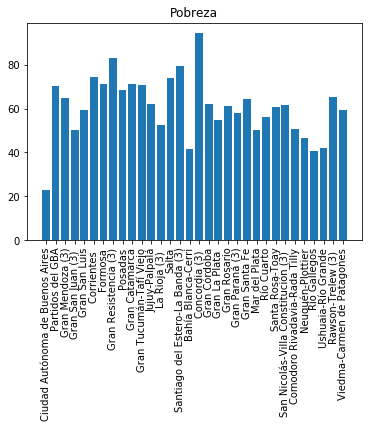

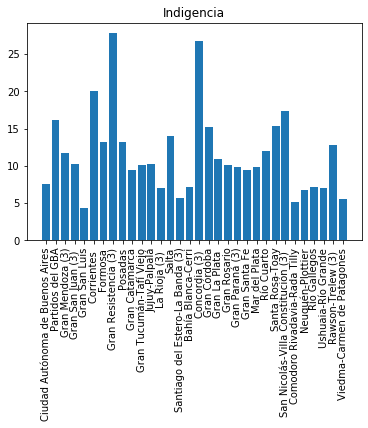

In [51]:
import numpy as np

# armamos un diccionario con los datos
eph = open("datos/eph_pobreza2019.csv").readlines()
header = eph[0]
datos_eph = {}

## obtenemos los nombres de las columnas como claves del diccionario
for columna in header.split(";"):
    columna = columna.strip().lower()
    datos_eph[columna] = []

## cargamos valores como str
for r in eph[1:]:
    data_r = r.split(";")
    for clave, val in zip(datos_eph, data_r):
        datos_eph[clave].append(val)

# Todo a numpy
## Convierto cada lista a numpy
for k in datos_eph:
    datos_eph[k] = np.array(datos_eph[k])

## Convierto a datos float los que deberían serlo, a partir de la 3ra columna
claves_con_num = list(datos_eph.keys())[2:]
for k in claves_con_num:
    datos_eph[k] = datos_eph[k].astype(np.float)
    
## Ahora puedo operar directamente
dp = datos_eph["pobrezahogares"] + datos_eph["pobrezapersonas"]
di = datos_eph["indigenciahogares"] + datos_eph["indigenciapersonas"]


# Visualizamos en un gráfico de barras por separado
from matplotlib import pyplot as plt

plt.bar(datos_eph["subregiones"], dp)
plt.xticks(rotation=90)
plt.title("Pobreza")

plt.figure()
plt.bar(datos_eph["subregiones"], di)
plt.xticks(rotation=90)
plt.title("Indigencia")